<img src="../code/Resources/cropped-SummerWorkshop_Header.png"> 

<h1 align="center">Workshop 2: Tutorial on neuronal decoding and behavior</h1> 
<h3 align="center">Summer Workshop on the Dynamic Brain</h3> 
<h3 align="center">Thursday, August 26th, 2025</h3> 
<h4 align="center">Day 2</h4> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# 0.0 Neural Coding 

Neural coding describes how neurons represent information about the world. Coding can be studied by asking whether external or internal events lead to changes in neural activity (<b>encoding</b>), or by asking whether different types of information can be read out from neural activity (<b>decoding</b>). In this workshop we will focus on this later problem. Specifically, we will try to read out information about stiumus identity from neurons recorded during the Dynamic Routing Task. 

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### 0.1 The dyanamic routing task

Recall the task from before lunch! There are 4 stimuli, two auditory and two visual, plus catch trials. Add more relevent details here.


<center><img src="Resources/DR_task_description.png", width="10300" height="400"> </center>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### 0.2 Our questions 

XXXX

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# 1.0 Setup

To Python, we first need packages Lets start with some you are familiar with. Numpy, Pandas, and matplotlib should be favorites of yours by now. In addition, lets grab your new friend pynwb so that we can actually look some data!


In [537]:
# Lets start by importing some basic packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# pynwb is for reading python NWB files
import pynwb

pd.set_option('display.max_columns', None)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.1 An example session.

We will all use the same one to get started. 

In [538]:
# intialize session_id and get session object [may be use different mice per student?]
session_id = '742903_2024-10-22'

nwb_path = f'/root/capsule/data/{session_id}/{session_id}.nwb'
session = pynwb.NWBHDF5IO(nwb_path).read()

/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


In [539]:
# Take a look at the session object.
session

Data type,float64
Shape,"(463723,)"
Array size,3.54 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(463716,)"
Array size,3.54 MiB
Chunk shape,None


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.2 The trials table

Remember that the trial table lists all the per-trial event data.

In [540]:
# get trials data
trials = session.trials.to_dataframe()
trials.head()

,start_time,stop_time,quiescent_start_time,quiescent_stop_time,stim_start_time,stim_stop_time,response_window_start_time,response_window_stop_time,task_control_response_time,response_time,reward_time,post_response_window_start_time,post_response_window_stop_time,stim_name,block_index,rewarded_modality,trial_index,trial_index_in_block,repeat_index,is_response,is_correct,is_incorrect,is_hit,is_false_alarm,is_correct_reject,is_miss,is_go,is_nogo,is_rewarded,is_noncontingent_reward,is_contingent_reward,is_reward_scheduled,is_instruction,is_aud_stim,is_vis_stim,is_catch,is_target,is_aud_target,is_vis_target,is_nontarget,is_aud_nontarget,is_vis_nontarget,is_vis_rewarded,is_aud_rewarded,is_block_switch,is_repeat,is_opto
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2519.80321,2525.30780,2519.80321,2521.27107,2521.31188,2521.81188,2521.38786,2522.30530,2521.83822,2521.82993,2521.85567,2522.33576,2525.33828,sound1,0,aud,0,0.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
1,2525.44123,2530.94584,2525.44123,2526.90917,2526.94985,2527.44985,2527.02589,2527.94336,2527.12598,2527.11877,2527.14350,2527.97381,2530.97633,sound1,0,aud,1,1.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
2,2536.26697,2541.77160,2536.26697,2537.73488,2537.77573,2538.27573,2537.85162,2538.76911,2537.96839,2537.95773,2537.98592,2538.79936,2541.80184,sound1,0,aud,2,2.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
3,2542.27204,2547.77662,2542.27204,2543.73989,2543.78094,2544.28094,2543.85669,2544.77445,2543.97345,2543.96458,2543.99087,2544.80438,2547.80690,sound1,0,aud,3,3.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False
4,2551.89673,2557.40138,2551.89673,2553.36467,2553.40561,2553.90561,2553.48137,2554.39889,2553.58150,2553.56528,2553.59906,2554.42934,2557.43187,sound1,0,aud,4,4.0,0.0,True,True,False,True,False,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.3 The units table

Just as the trials table contains information about each trial, the "units" table contains information about each unit!. Lets take a look.

In [541]:
# get units table 
units_table = session.units.to_dataframe()
units_table.head()

,activity_drift,amplitude,amplitude_cutoff,amplitude_cv_median,amplitude_cv_range,amplitude_median,ccf_ap,ccf_dv,ccf_ml,channels,cluster_id,d_prime,decoder_label,decoder_probability,default_qc,device_name,drift_mad,drift_ptp,drift_std,electrode_group_name,exp_decay,firing_range,firing_rate,half_width,is_not_drift,isi_violations_count,isi_violations_ratio,isolation_distance,l_ratio,location,nn_hit_rate,nn_miss_rate,num_negative_peaks,num_positive_peaks,num_spikes,peak_channel,peak_electrode,peak_to_valley,peak_trough_ratio,peak_waveform_index,presence_ratio,recovery_slope,repolarization_slope,rp_contamination,rp_violations,silhouette,sliding_rp_violation,snr,spike_amplitudes,spread,structure,unit_id,velocity_above,velocity_below,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.037276,295.738655,0.000024,0.119623,0.091381,236.340000,4450.0,4400.0,4950.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,8.460060,sua,0.76,True,20097906812,0.646459,10.051738,1.746884,probeA,0.036991,3.8,4.891656,0.000160,True,1.0,0.001804,92.271246,0.008869,LSr,0.893762,0.001312,1,1,37776.0,0,0,0.000507,-0.281446,0,1.000000,-119515.135360,1.402202e+06,0.002709,1.0,0.209374,0.010,16.533775,"[-121.67999, -107.64, -142.73999, -109.979996,...",40.0,LSr,742903_2024-10-22_A-0,242.707518,NaN,"[20.28927901589777, 20.311845609610423, 20.462...","[[20.22514588989608, 7742.738080300452]]",location ...,probeA pynwb.ecephys.ElectrodeGroup at 0x13996...,"[[-2.8828790187835693, -1.750319004058838, -1....","[[15.012916564941406, 16.09957504272461, 13.74..."
1,0.035985,88.367762,0.002602,0.325891,0.232566,60.839996,4450.0,4400.0,4950.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",1,1.973730,mua,0.87,False,20097906812,NaN,NaN,NaN,probeA,0.017509,0.4,0.113434,0.000217,True,1.0,3.354522,43.712372,2.506822,LSr,0.214425,0.021882,1,1,876.0,1,1,0.000550,-0.435878,1,0.992188,-49092.995591,2.994365e+05,0.000000,0.0,0.025452,NaN,4.447247,"[-84.24, -126.35999, -114.659996, -133.37999, ...",80.0,LSr,742903_2024-10-22_A-1,480.240180,NaN,"[22.243439365091692, 24.726864669927423, 26.76...","[[20.22514588989608, 7742.738080300452]]",location ...,probeA pynwb.ecephys.ElectrodeGroup at 0x13996...,"[[-1.2355196475982666, -0.3322800099849701, -1...","[[16.898168563842773, 17.95831298828125, 13.93..."
2,0.225617,78.511684,0.000050,0.237714,0.101337,53.820000,4400.0,4400.0,4950.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",2,2.796198,mua,0.54,True,20097906812,1.105313,12.480831,2.101816,probeA,0.018652,6.4,5.526551,0.000253,False,45.0,0.063595,58.373226,1.475664,LSr,0.329873,0.022277,1,1,42679.0,2,2,0.000553,-0.457594,2,1.000000,-42487.653905,2.601561e+05,0.036711,17.0,0.024314,0.035,5.188625,"[-58.499996, -58.499996, -77.21999, -72.54, -4...",100.0,LSr,742903_2024-10-22_A-2,NaN,NaN,"[20.403111981228214, 20.608577983657746, 21.07...","[[20.22514588989608, 7742.738080300452]]",location ...,probeA pynwb.ecephys.ElectrodeGroup at 0x13996...,"[[-0.5241601467132568, -0.5943599939346313, -1...","[[14.711466789245605, 16.18790626525879, 13.58..."
3,0.040646,100.098114,NaN,NaN,NaN,72.540000,4400.0,4400.0,4950.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",3,3.496054,mua,0.51,False,20097906812,NaN,NaN,NaN,probeA,0.025959,0.2,0.053998,0.000173,True,0.0,0.000000,48.755916,2.557953,LSr,0.192254,0.015131,1,1,417.0,2,2,0.000493,-0.376650,2,0.898438,-51082.621160,3.705844e+05,0.000000,0.0,0.034633,NaN,6.982127,"[-74.88, -95.939995, -67.86, -95.939995, -98.2...",100.0,LSr,742903_2024-10-22_A-3,720.005846,NaN,"[33.33537017340589, 47.896756432219036, 48.233...","[[20.22514588989608, 7742.738080300452]]",location ...,probeA pynwb.ecephys.ElectrodeGroup at 0x13996...,"[[0.44892096519470215, 0.6228775978088379, -0....","[[14.37304973602295, 15.364265441894531, 12.62..."
4,0.090812,152.652222,0.000119,0.311789,0.138612,107.640000,4400.0,4400.0,4950.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",4,4.199836,sua,0.74,True,20097906812,NaN,NaN,NaN,probeA,

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
<h3> How many units are in the units table?? </h3>
    

In [542]:
# solution
len(units_table)

4446

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.4 Unit QC

Thats a lot of units. But do we trust them all?

The truth is, one of the biggest challenges with ephy analysis sorting units and figuring out which are safe to use. Neuropixels, by virtue of having many contacts near eachother, make it possible to record many units simultaniously. This is great, but it creates an additional challenge of knowing which units are "good" for analysis. Because large recordings are almost always sorted algorithmically, selecting good units is particularly important because no human has manually identified which units are safe for further analysis.

The units table contains many unit QC metrics. Typically, rather than just blindly trusting every output of the automated sorting, we typically impose some constraints on the data. Here are a few examples of useful ones:

+ isi_violations_ratio: what fraction of spikes happen closer together than should be possible for a neuron. If this is too high, its a sign of eather non-neuronal noise or more than one neuron getting merged into a unit.
+ amplitude_cutoff: neurons have a maximum expected spike size. If a sorted unit's waveform is too large, its a sign that it isn't really a neruon.
+ presence_ratio: recordings are not 100% static. If the there is mechanical drift, the unit won't be present for the entire session. This adds all sorts of problems for analysis down the road - how can you compare accorss sessions if your unit comes or goes between them? we therefore want to use only units that we can follow through the recording.

Note that exactly which unit QC criteria you use may very based on the questions you ask. Have a question that doesn't really depend on well isolated neurons? Try loosening these criteria. Need to know about the differences of well-isolated units over a long timescale? try tightening them. As a starting place, though, these numbers are reasonable.

In [543]:
# QC criteria? 
good_units = units_table[
    (units_table.isi_violations_ratio<.5) &
    (units_table.amplitude_cutoff<.1) &
    (units_table.presence_ratio>.95)
    ]
print(len(good_units))

1881


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.5 Select neurons from MOs

MOs is a secondary motor cortex. If you think this is an odd place to start looking for signals about stimulus encoding, then hold on to that thought.


In [544]:
# Get data for one structure
this_structure_units_table = good_units[good_units.structure=='MOs']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 2 Can we decode stimulus identity from a single neuron?

Its time to look at our first neuron from this course! (WOOT).

You are going to hear this many times over the next to weeks: In this course, we will fit many models with increaseing levels of abstraction to our data. It is always going to be tempting to jump streight into modeling, and gloss over the actual data. Don't be tempted to do this! Looking at and understanding your  data is, at the end of the day, alway more important than whatever model you might fit. Afterall, if your data are bad, so is your model.

Fortunatly, someone here has already done a good chunk of the QC on our data. So here, "data" really means the spike times for a given unit.

With this in mind, lets look at the activity of a single neuron as the mouse is presented with its stimulus. First, we need some data.


In [545]:
# Choose a neuron to start.
unit = 18
# Get the spike times for this neuron
spike_times = this_structure_units_table.spike_times.values[unit]
print(spike_times)
# and get the times that the stimulus presentation started
stim_times=  trials.stim_start_time.values
print(stim_times[:10])

[  20.31401227   20.39697867   20.42534524 ... 7741.96971612 7742.27268181
 7742.3243483 ]
[2521.31188    2526.94985    2537.77573    2543.78094    2553.40561
 2562.06264    2567.76824    2573.87900006 2579.46663994 2589.9025    ]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 2.1 Rasters and PSTHs

What we what to know right now is, how does this neuron respond to a stimulus?

To answer this, we need to grab a window of time around the when the stimulus was presented. We will then look at the only the spikes that happen within this window. 

We are going to make two types of plots to visualize these data. 

+ The first we call a <b> raster </b> plot. Here, we will represent each spike by a dot, and each trial as a row in our plot.
+ The raster plot is useful for visualizng activity accross trials, but it can be difficult to quantify. With this in mind, we will also make a <b> Peristimulus Time Histogoram </b> or <b> PSTH </b>. This is the averaged stimulus triggered average for the neuron or, equivalently, a histogram showing the average of the raster plot.

In [546]:
# Define a stimulus window.
pre_window  = .5 # How far before the stimulus should we look?
post_window = 2 # How far after the stimulus should we look?
bin_size = .05 # What size bins do we want for our PSTH?
bins = np.arange(-pre_window,post_window+binsize,bin_size) # Set up bins
bin_centers = bins[:-1]+bin_size/2
# Storage for data.
triggered_spike_times = []
triggered_trial_index = []

# Loop through the stimuli!!
for i, stim_time in enumerate(stim_times):
    # Select spikes that fall within the time window around this stimulus
    mask = ((spike_times >= stim_time - pre_window) & 
            (spike_times < stim_time + post_window))
    
    # Align spike times to stimulus onset (0 = stimulus)
    trial_spikes = spike_times[mask] - stim_time

    triggered_spike_times.append(trial_spikes)
    triggered_trial_index.append(np.ones(len(trial_spikes))*i)

# triggered_spike_times now has the times of each spike per trial.  
print(triggered_spike_times[:3])
# triggered_trial_index is for keeping track of which trial this spike was from
print(triggered_trial_index[:3])

[array([0.0596801 , 0.11211327, 0.12577989, 0.16011311, 0.1641131 ,
       0.21514627, 0.23334621, 0.24544617, 0.42607892, 0.50571199,
       0.56467847, 1.02074366, 1.7918745 ]), array([0.26209122, 1.8872193 ]), array([0.09611009, 0.36877588, 1.85537107, 1.87970433, 1.9286375 ,
       1.98767065])]
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1.]), array([2., 2., 2., 2., 2., 2.])]


In [547]:
# For plotting, we are going to want to concatenate these data into one big vector
triggered_spike_times = np.concatenate(triggered_spike_times)
triggered_trial_index = np.concatenate(triggered_trial_index)

Text(0, 0.5, 'Spike Rate (Hz)')

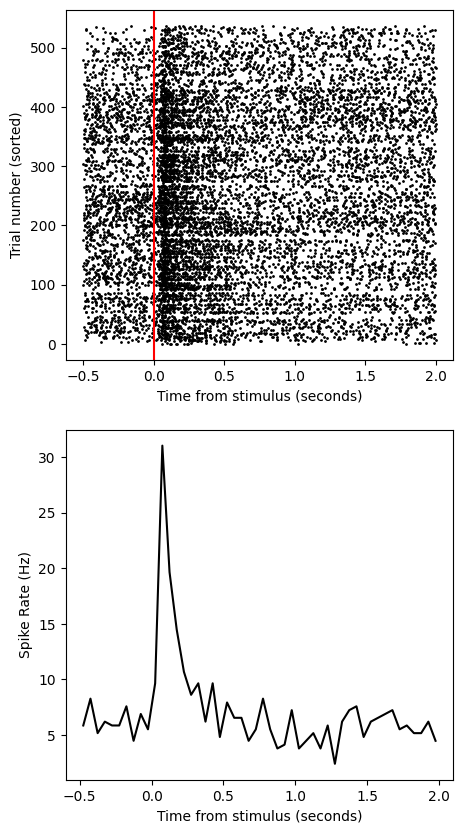

In [548]:


# Instantiate a plot
fig,ax = plt.subplots(nrows = 2,figsize =(5,10))

# Plot the raster! Its just dots, so we use scatter.
# The 'k' here is a shoutout to all the matlab users...
ax[0].scatter(triggered_spike_times,triggered_trial_index,s = 1,c = 'k')
ax[0].set_xlabel('Time from stimulus (seconds)')
ax[0].set_ylabel('Trial number (sorted)')
ax[0].axvline([0],c = 'r')

# and make the histogram.
a,b = np.histogram(this_triggered_spike_times,bins = bins)
# Divide by # of trials, then bin size to get a rate estimate in Spikes/Sec = Hz
a = a/np.max(this_trl_idx)/binsize
ax[1].plot(bin_centers,a,c = 'k')
ax[1].set_xlabel('Time from stimulus (seconds)')
ax[1].set_ylabel('Spike Rate (Hz)')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Great! We have a neuron that responds to the stimulus!

But remember our goal here- we want to know if we can decode the difference between stimuli from this neuron. With that in mind, lets try seperating out the different stimulus identities.

One handy way to do this seperation is to use numpy's <b> unique </b> function. Selecting return_inverse will give a easy way to sort the trial identities.

In [362]:
# Get the stimulus shown for each spike trial
unq,stim_id = np.unique(trials.stim_name[triggered_trial_index],return_inverse = True)
print(unq)
print(stim_id[::25])

['catch' 'sound1' 'sound2' 'vis1' 'vis2']
[1 1 2 3 4 4 2 1 2 3 4 0 2 1 4 4 4 2 4 3 2 2 4 0 0 4 2 2 0 2 0 3 4 3 4 2 2
 2 0 0 4 2 3 4 3 0 4 2 0 3 4 2 2 3 2 2 1 1 4 2 2 2 2 1 2 2 2 4 2 2 2 4 4 1
 0 3 4 4 2 4 1 4 2 2 1 3 1 4 0 0 1 2 4 4 4 4 2 2 2 3 1 4 1 4 2 1 4 0 2 2 2
 1 0 2 4 2 4 1 4 4 4 4 2 1 2 0 1 2 3 0 2 1 1 4 1 1 4 1 2 0 3 2 3 2 3 0 1 3
 4 2 1 0 4 4 4 4 2 2 0 4 1 2 2 2 2 4 2 4 3 3 0 2 1 3 4 1 4 3 4 2 2 3 4 1 0
 2 2 2 3 2 2 4 3 4 1 4 0 3 2 4 3 1 2 2 1 3 4 2 1 4 4 4 3 4 1 3 4 3 2 4 2 2
 1 4 1 2 3 1 2 2 1 3 2 3 4 4 2 4 1 4 0 2 2 2 2 4 1 2 1 2 1 2 2 3 1 4 4 4 4
 1 2 4 3 1 4 4 4 2 2 1 2 1 4 4 2 2 0 2 1 3 4 1 1 3 0 4 2 2 2 2 2 2 2 1 4 3
 4 2 4 1 1 3 4 4 3 3 2 3 2 2 1 2 2 2 3 2 0 4 4 1 1 4 4 1 0 2 2 3 3 2 3 4 4
 4 3 2 2 4 1 2 2 1 4 2 1 0 3 2 1 4 2 4 2 3 3 3 4 2 3 4 1 4 1 3 3 4 2 2 2 4
 1 1 3 2 3 2 2 2 4 1 2 4 1 3 4 4 0 1 2 4 2 2 1 3 1 2 3 0 2 1 3]


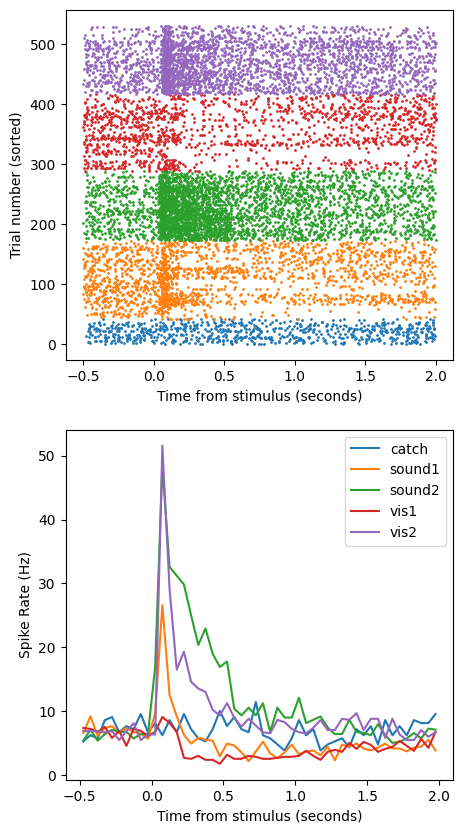

In [363]:

fig,ax = plt.subplots(nrows = 2,figsize =(5,10))

# A counter, useful for stacking plots
counter = 0
for ii in range(len(unq)):
    # Plot the raster just for this stimulus type
    this_triggered_spike_times = triggered_spike_times[stim_id==ii]
    _,this_trl_idx = np.unique(triggered_trial_index[stim_id==ii],return_inverse = True)
    ax[0].scatter(this_triggered_spike_times,counter + this_trl_idx,s = 1)
    ax[0].set_xlabel('Time from stimulus (seconds)')
    ax[0].set_ylabel('Trial number (sorted)')

    # stack the plots
    counter +=np.max(this_trl_idx)
    
    # Plot the raster just for this stimulus type
    a,b = np.histogram(this_triggered_spike_times,bins = bins)
    a = a/np.max(this_trl_idx)/binsize
    ax[1].plot(bin_centers,a,label = unq[ii]) # Note that we are labeling each plot
    ax[1].set_xlabel('Time from stimulus (seconds)')
    ax[1].set_ylabel('Spike Rate (Hz)')
ax[1].legend() # Plot a legend using the established labels.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 2.2 Linear Classifier
So far these data are promissing - on average, the neuron doesn't respond the same way on every trial.

We are now ready to use a mathematical model to see if we decode stimulus identity from this neuron. Note that, despite these promissing averages, this many not be a garantee - the variability accross trials may still make this very difficult.

For now, we will start with a linear classifier. Specifically, we will use sklearn's implementation of a <b>Support Vector Classifier</b>, or <b>SVC</b>. You will also here these refered to as a <b> Support Vector Machine (SVM) </b>. Importantly, this means we have officially made it to the machine learning part of the course. Yay!




In [364]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

A linear classifier will, in effect, attempt to find a linear divider to seperate to different classes of data. 

A SVC is a type of <b> supervised </b> classifier. This means that it is trained to do classification using data that have known labels.

Before we get to the neural data, lets work through a simple example of what this all means with some fake data.

Text(0, 0.5, '# Samples')

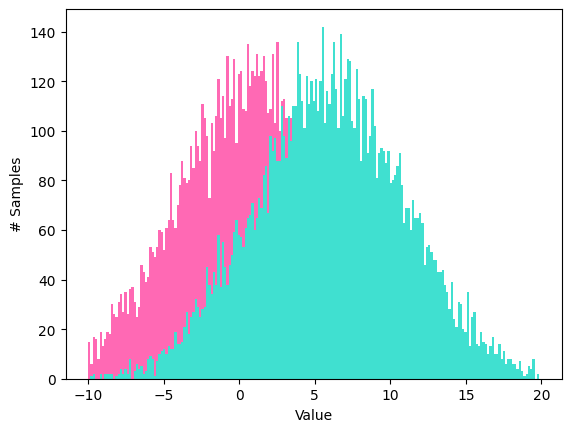

In [365]:
# Get some randomly generated data
x_1 = np.random.normal(loc = 1,scale = 5,size = 10000)
x_2 = np.random.normal(loc = 6,scale = 5,size = 10000)
# Class identities
y_1 = np.ones(x_1.shape)
y_2 = np.ones(x_2.shape)*2

# make these into one big vector
x = np.concatenate([x_1,x_2])
y = np.concatenate([y_1,y_2])

# Plot them!
fig,ax = plt.subplots()
tmp_bins = np.arange(-10,20,.15)
ax.hist(x_1,tmp_bins,color= 'hotpink')
ax.hist(x_2,tmp_bins,color = 'turquoise')
ax.set_xlabel('Value')
ax.set_ylabel('# Samples')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

One important thing to note here is that we are passing labeled data in an effort to learn the distinction between classes. This is a great way to build a model, but it comes with risks- because we are training our model using these data, it would not be fair to evaluate model performance using the same data.

In cases where we don't want to go out and colect more data, we can split our data into "training" and "testing." Sklearn provides a handy function for doing this called "train_test_spilt."


In [366]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now we are ready to fit our model. Again, sklearn provides a usefule interface for this.

Note: In this tutorial we are using SVC. However, one of the nice things about sklearn is that that it uses a standardized interface for all of its model fits. This makes it very easy to play with different classifiers, model types, etc.!

In [367]:
# Create a model fitting object
svc = LinearSVC()
svc

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [368]:
# SVC requires inputs be a certain shape. 
# When using 1-d arrays, we need to some reshaping to follow this convention
svc.fit(x_train.reshape(-1, 1),y_train.ravel())

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now that we have this model, we can use it to predict new data. One way of doing this is to our held out data, and see how well we did.

In [369]:
y_prediction = svc.predict(x_test.reshape(-1, 1))
score = np.sum(y_prediction==y_test)/(len(y_test))
score

np.float64(0.6976)

In [370]:
# This can also be acomplished using the built in "score" function
svc.score(x_test.reshape(-1, 1),y_test)

0.6976

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Alternativly, we can pass in x values to find out what class would have been predicted. This can be very useful for understanding how our model is actually doing its classification. 

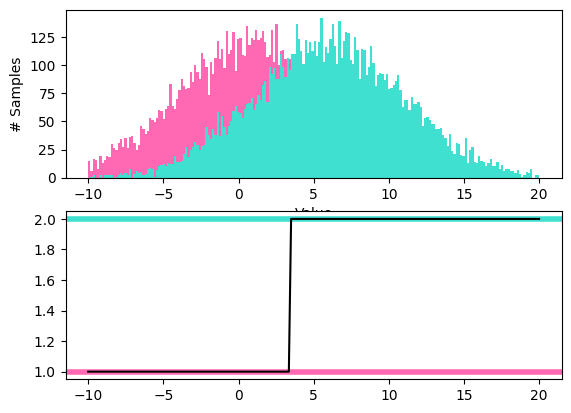

In [371]:
# numbers to test
tmp_bins = np.arange(-10,20.15,.15)

# Plot our origional distributions
fig,ax = plt.subplots(nrows = 2)
ax[0].hist(x_1,tmp_bins,color= 'hotpink')
ax[0].hist(x_2,tmp_bins,color = 'turquoise')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('# Samples')

# 
bins_prediction = svc.predict(tmp_bins.reshape(-1,1))
ax[1].axhline(1,color= 'hotpink',linewidth = 4)
ax[1].axhline(2,color= 'turquoise',linewidth = 4)
ax[1].plot(tmp_bins,bins_prediction,'k')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 2.3 Now lets try with a neuron!!

The challenge, of course, is that our neural data is high dimensional. To keep things interpretable, lets try to small window from the overall spike train that will give us a decent chance of decoding information from this neuron.

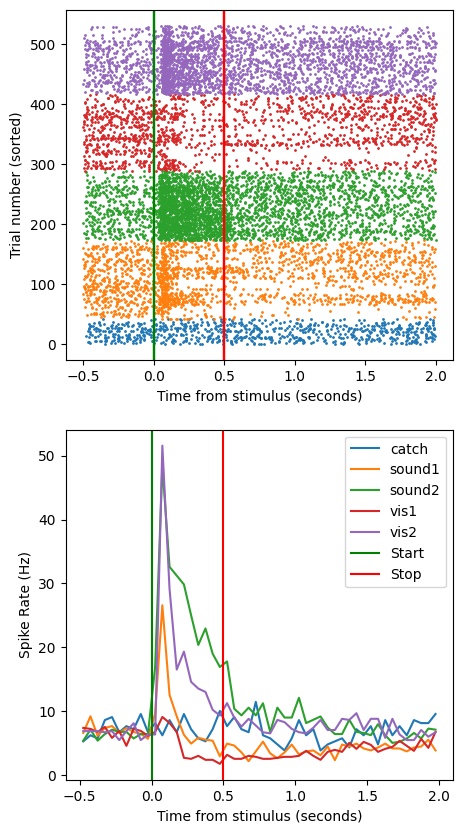

In [376]:
fig,ax = plt.subplots(nrows = 2,figsize =(5,10))

# A counter, useful for stacking plots
counter = 0
for ii in range(len(unq)):
    # Plot the raster just for this stimulus type
    this_triggered_spike_times = triggered_spike_times[stim_id==ii]
    _,this_trl_idx = np.unique(triggered_trial_index[stim_id==ii],return_inverse = True)
    ax[0].scatter(this_triggered_spike_times,counter + this_trl_idx,s = 1)
    ax[0].set_xlabel('Time from stimulus (seconds)')
    ax[0].set_ylabel('Trial number (sorted)')
    ax[0].axvline(0,c = 'green')
    ax[0].axvline(.5,c = 'red')


    # stack the plots
    counter +=np.max(this_trl_idx)
    
    # Plot the raster just for this stimulus type
    a,b = np.histogram(this_triggered_spike_times,bins = bins)
    a = a/np.max(this_trl_idx)/binsize
    ax[1].plot(bin_centers,a,label = unq[ii]) # Note that we are labeling each plot
    ax[1].set_xlabel('Time from stimulus (seconds)')
    ax[1].set_ylabel('Spike Rate (Hz)')
ax[1].axvline(0,c = 'green',label = 'Start')
ax[1].axvline(.5,c = 'red',label = 'Stop')
ax[1].legend() # Plot a legend using the established labels.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can start by counting the number of spikes for each trial type within this window. We will then go about fiting a linear classier to attempt to decode trial type from number of spikes within our window!

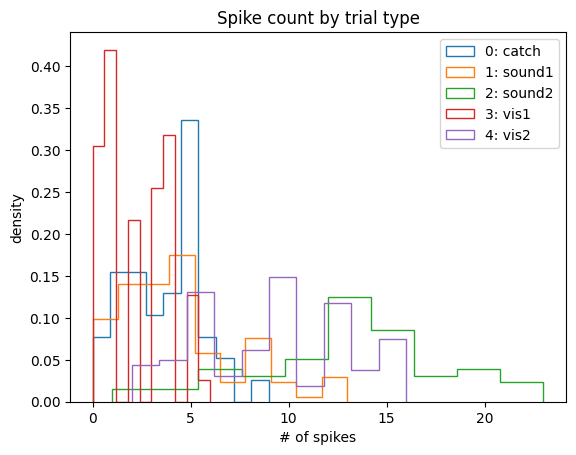

In [421]:
spike_times = this_structure_units_table.spike_times.values[uu]
stim_times = trials.stim_start_time

start= 0
stop = .5

spike_count = []
trial_index = []


for i, stim_time in enumerate(stim_times):
    # Select spikes that fall within the time window around this stimulus
    mask = ((spike_times >= stim_time + start) & 
            (spike_times < stim_time + stop))
    
    # Count spikes in this bin
    spike_count.append(len(spike_times[mask]))
    
spike_count = np.array(spike_count)
trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(trials.stim_name.values,return_inverse=  True)

fig,ax = plt.subplots()
for jj in range(5):
    ax.hist(spike_count[trial_id==jj],10,histtype='step',label = str(jj)+': ' + unq[jj],density=True)

ax.set_xlabel('# of spikes')
ax.set_ylabel('density')
ax.set_title('Spike count by trial type')
ax.legend()

In [395]:
# Just as before, we need to split out data.
x_train,x_test,y_train,y_test = train_test_split(spike_count,trial_id)

# Note that we are using the same x = predictor, y = class 
# label convention that we were using before. 
print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (403,)
y train shape: (403,)
x test shape: (135,)
y test shape: (135,)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
<h3> Ready? </h3>
Go ahead and fit a linear SCV to the training data!

In [405]:
# Make a new model
svc = LinearSVC()
# Fit with data!
svc.fit(x_train.reshape(-1,1),y_train.ravel());

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Try passing a few spike rates to your shiny new model </h3> 

How do things compare to the histogram we just made?


In [406]:
# Now lets try it
clf.predict(np.array([20]).reshape(-1,1))

array([2])

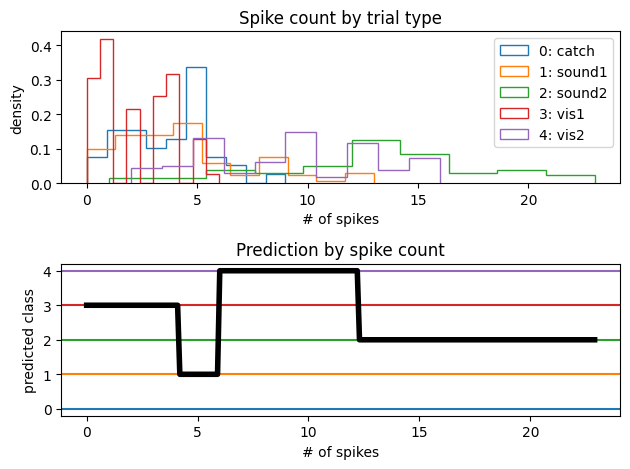

In [472]:
import matplotlib as mpl
prop_cycle = plt.rcParams['axes.prop_cycle']
color_list = [entry['color'] for entry in prop_cycle]

input_spike_count = np.arange(0,np.max(spike_count),.1) 
predicted_class = clf.predict(input_spike_count.reshape(-1,1))
fig,ax = plt.subplots(nrows = 2)
for jj in range(5):
    ax[0].hist(spike_count[trial_id==jj],10,histtype='step',label = str(jj)+': ' + unq[jj],density=True)

ax[0].set_xlabel('# of spikes')
ax[0].set_ylabel('density')
ax[0].legend()
ax[0].set_title('Spike count by trial type')


for ii in range(5):
    ax[1].axhline(ii,c = color_list[ii])
ax[1].plot(input_spike_count,predicted_class,'k',linewidth = 4)
ax[1].set_xlabel('# of spikes')
ax[1].set_ylabel('predicted class')
ax[1].set_title('Prediction by spike count')

fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

But how good is this model, really?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Compute the model score on your held out testing data</h3> 

Is this good? Is it better than "chance"


In [473]:
prediction = clf.score(x_test.reshape(-1,1),y_test.ravel())

In [474]:
# But how good is our model????
score = svc.score(x_test.reshape(-1,1),y_test.ravel())
score

0.4222222222222222

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Is this any good? When examining the answer to that question, it is probably most useful to ask, "how much better was our classifier than if we had just guessed by chance".

In cases where you have evenly distributed classes, chance estimates are easy. For example, if we just had 5 classes here, chance performance would be .2. 

However, we don't have exactly even numbers of trials: there are, for example, fewer catch trials. In cases like this, we can sometimes estimate a "chance" figure by asking, "if we shuffled trial identities, what fraction of the time would they line up with the true trial identity."

In [484]:
chance_est = []
for ii in range(1000):
    shuffled_trial_id = trial_id[np.random.randint(len(trial_id))]
    chance_est.append(np.sum(trial_id==shuffled_trial_id)/len(trial_id))
print(f'Bootstrapped chance estimate: {np.mean(chance_est)}')

Bootstrapped chance estimate: 0.21882899628252792


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

It is worth saying that, because we have more than one class, we can dig a little deeper into our prediction.

Specifically, when we guess incorrectly, miss-classifications often have structure to them. A confusion matrix is a useful tool to understand mistakes a classifier makes. Here we plot, given a "true" class, what was the distribution of predictions made by our classifier.

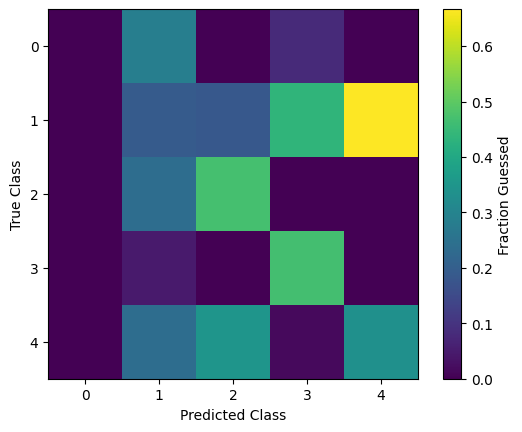

In [485]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(x_test.reshape(-1,1))

fig,ax = plt.subplots()
im  = ax.imshow(confusion_matrix(y_true=y_test, y_pred=prediction, normalize='pred'))
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
cbar = plt.colorbar(im)
cbar.set_label('Fraction Guessed')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Compare the confusion matrix to the histogram for this neuron </h3> 

Can you understand why the classifier is making the errors that it is?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 3.0 Now for a neural population.

While the mathematical formalizim is useful to understand what our chosen neuron is doing here, if we are being honest its probably overkill for understanding this single neurons activity. There are, in fact, whole classes of regression models that might be better suited for asking what information a neuron encodes. 

Why, then, have we spent so much time on this example? Decoding gives us a mathematical way to look at what information we can extract from a neural population. As this population becomes larger, however, it can become increasingly difficult to visualize and intuite what our decoder is doing under the hood. Starting with this one-dimension example will help with inuition as we move to this harder case.


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

To start, lets use decoding to take a hard look at the timescale of MOs' encoding of stimulus identity. 

Doing this is going to require a fair bit of data wrangling. Just as before, we needed to get the number of spikes per trial. But if we are looking over time and over neurons, we need to get the number of spikes for each neuron on each trial. 

Here is one way to do this, though you will notice that it is a little on the slow side.

In [490]:
%%timeit -n 1 -r 1

n_neurons = len(this_structure_units_table.spike_times.values)
stim_times = trials.stim_start_time


bins = np.arange(-.3,2,.1)
storage = np.empty((n_neurons,len(stim_times),len(bins)-1))

for nn in range(n_neurons):
    spike_times = this_structure_units_table.spike_times.values[nn]

    spike_count = []
    trial_index = []
    
    for i, stim_time in enumerate(stim_times):
        # Select spikes that fall within the time window around this stimulus

        mask = ((spike_times >= stim_time + np.min(bins)) & 
                (spike_times < stim_time + np.max(bins)))
        
        # Align spike times to stimulus onset (0 = stimulus)
        trial_spikes,_ = np.histogram(spike_times[mask] - stim_time,bins)
        
        spike_count.append(trial_spikes)
    
    storage[nn,:,:] = np.array(spike_count)
trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(trials.stim_name.values,return_inverse=  True)

10.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This code is actually pretty hard to follow. It would be more readable if we converted the core piece of it into a function:

In [491]:
def get_binned_triggered_spike_times(spike_times,stim_times,bins):
    spike_count = []
    trial_index = []
    
    for i, stim_time in enumerate(stim_times):
        # Select spikes that fall within the time window around this stimulus
        
        mask = ((spike_times >= stim_time + np.min(bins)) & 
                (spike_times < stim_time + np.max(bins)))
        
        # Align spike times to stimulus onset (0 = stimulus)
        trial_spikes,_ = np.histogram(spike_times[mask] - stim_time,bins)
        
        spike_count.append(trial_spikes)
    return np.array(spike_count)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This gives us:

In [492]:
%%timeit -n 1 -r 1
n_neurons = len(this_structure_units_table.spike_times.values)
stim_times = trials.stim_start_time


bins = np.arange(-.3,2,.1)
storage = np.empty((n_neurons,len(stim_times),len(bins)-1))

for nn in range(n_neurons):
    spike_times = this_structure_units_table.spike_times.values[nn]

    spike_count = []
    trial_index = []

    storage[nn,:,:]  = get_binned_triggered_spike_times(spike_times,stim_times,bins)

trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(trials.stim_name.values,return_inverse=  True)

10.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This version has the advantage of being faster, but doesn't actually save us any time.

Now, we are going to give you the *fast* version of this function. If you end up working with triggered spiketrains much durring this course, the difference in time here can be pretty meaningful.

In [493]:
def get_binned_triggered_spike_counts_fast(spike_times, stim_times, bins):
    """
    Fast peri-stimulus time histogram using searchsorted.

    Parameters
    ----------
    spike_times : 1D array_like, sorted
        Times of all spikes (e.g. in seconds).
    stim_times : 1D array_like
        Times of stimulus onsets.
    bins : 1D array_like
        Bin edges *relative* to stimulus (e.g. np.linspace(-0.1, 0.5, 61)).

    Returns
    -------
    counts : 2D ndarray, shape (n_trials, len(bins)-1)
        counts[i, j] is the number of spikes in bin j of trial i.
    """
    # ensure numpy arrays
    spike_times = np.asarray(spike_times)
    stim_times = np.asarray(stim_times)
    bins = np.asarray(bins)

    # If your spike_times isn't already sorted, uncomment:
    # spike_times = np.sort(spike_times)

    n_trials = stim_times.size
    n_bins = bins.size - 1
    counts = np.zeros((n_trials, n_bins), dtype=int)

    for i, stim in enumerate(stim_times):
        # compute the absolute edges for this trial
        edges = stim + bins
        # find the insertion indices for each edge
        idx = np.searchsorted(spike_times, edges, side='left')
        # differences between successive indices = counts per bin
        counts[i, :] = np.diff(idx)

    return counts

In [499]:
%%timeit -n 1 -r 1
n_neurons = len(this_structure_units_table.spike_times.values)
stim_times = trials.stim_start_time


bins = np.arange(-.3,2,.1)
storage = np.empty((n_neurons,len(stim_times),len(bins)-1))

for nn in range(n_neurons):
    spike_times = this_structure_units_table.spike_times.values[nn]

    spike_count = []
    trial_index = []

    storage[nn,:,:]  = get_binned_triggered_spike_counts_fast(spike_times,stim_times,bins)

trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(trials.stim_name.values,return_inverse=  True)

1.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


Now, even though we binned at a higher temporal rate than before, we can still fit a classifier that is analogous to our single-neuron version.

In [503]:
bins[3:9]

array([5.55111512e-17, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
       4.00000000e-01, 5.00000000e-01])

Model score: 0.9629629629629629


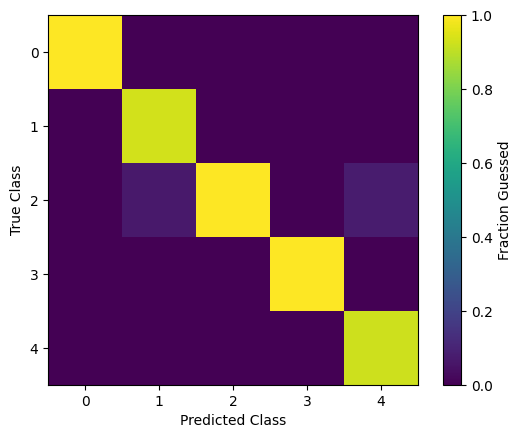

In [508]:
# Get the average rate for each neuron from 0-.5 seconds
X = np.sum(storage[:,:,3:9],axis=2).T 
# Spit the data
x_train,x_test,y_train,y_test = train_test_split(X,trial_id)

svc = LinearSVC()
svc.fit(x_train,y_train)
print(f'Model score: {svc.score(x_test,y_test)}')

prediction = svc.predict(x_test)
fig,ax = plt.subplots()
im  = ax.imshow(confusion_matrix(y_true=y_test, y_pred=prediction, normalize='pred'))
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
cbar = plt.colorbar(im)
cbar.set_label('Fraction Guessed')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


Impressive, right?

What this means is that we can, using all of our MOs neurons, very reliably decode stimulus identity. This is, in and of itself, pretty exciting. But we can use our new decoding technique to dig deeper into the behavior of the neural population within our chosen time window.

To do this, we can loop through a fit a model to each time bin. Once we have that model, we can compute the score for each model using both the training and testing partitions in our dataset.

In [511]:
score_train = np.zeros(len(bins)-1)
score_test = np.zeros(len(bins)-1) 

# Loop through and fit a model to each time bin.
for ii in range(len(bins)-1):
    clf = svm.SVC()
    x_train,x_test,y_train,y_test = train_test_split(storage[:,:,ii].T,trial_id)
    clf.fit(x_train,y_train)
    # Find score on both the training and the test data.
    score_train[ii] = clf.score(x_train,y_train)
    score_test[ii] = clf.score(x_test,y_test)

Text(0, 0.5, 'Model Score')

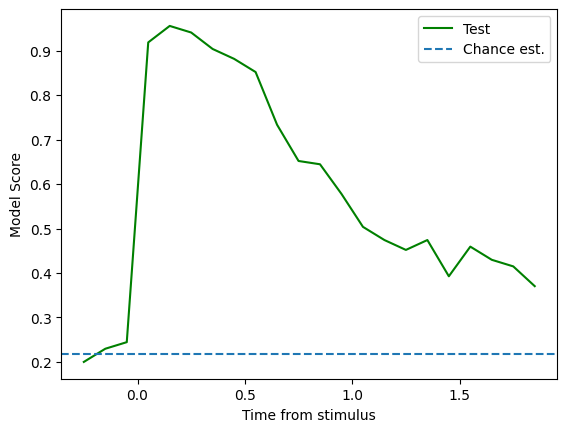

In [520]:

fig,ax = plt.subplots()
ax.plot(bins[:-1]+.05,score_test,color = 'green',label = 'Test')
ax.axhline(np.mean(chance_est),linestyle = '--',label = 'Chance est.')
ax.legend()
ax.set_xlabel('Time from stimulus')
ax.set_ylabel('Model Score')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Remember how we made such a big deal about splitting our data before? The importance of doing this becomes especially visible now that we have moved to the high dimensional, many neuron case. Because the dimensionality here is so high, models tend to do very, very well at predicting the data they were trained on. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Plot bot the testing and training data scores </h3> 

How does it compare? How does it compare to our chance estimate?


Text(0, 0.5, 'Model Score')

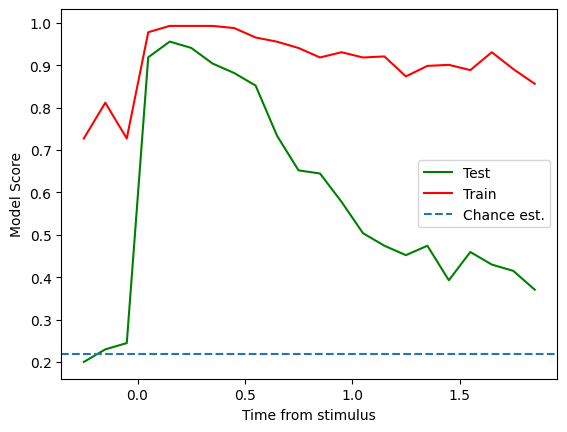

In [523]:
fig,ax = plt.subplots()
ax.plot(bins[:-1]+.05,score_test,color = 'green',label = 'Test')
plt.plot(bins[:-1]+.05,score_train,color = 'red',label = 'Train')

ax.axhline(np.mean(chance_est),linestyle = '--',label = 'Chance est.')
ax.legend()
ax.set_xlabel('Time from stimulus')
ax.set_ylabel('Model Score')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

So far, we have seen only a single train/test split for each dataset. However, it is often useful to split your data multiple times. Depending on how you do this, it can allow you to do more fine grained charecterization of either the variability or (depending on how you split) timecourse of what you are decoding.

To make this easy, sklearn includes a cross_validate function that automates much of what you could achive yourself using a for loop. Its default is to do 5-fold cross validation. This means that the data is split in 5ths. 5 models are then fit, each with 4/5 of the data for training and the remaining 1/5 for testing. 

Lets try it here for 0-100 ms.

Note: There is nothing special about the number 5- you can use n-fold cross validation as suits your question. In the extream case, you can use "Leave-one-out" cross validation, where n= number of samples. 


In [526]:
from sklearn.model_selection import cross_validate
cross_validate(svm.SVC(),storage[:,:,3].T,trial_id)

{'fit_time': array([0.02523565, 0.02426362, 0.02288556, 0.02338886, 0.0223248 ]),
 'score_time': array([0.01438832, 0.01330709, 0.01394916, 0.01412749, 0.01370168]),
 'test_score': array([0.89814815, 0.89814815, 0.89814815, 0.89719626, 0.82242991])}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now, we can loop through to get a sense of our decoder variance over time. This effectivly allows us to draw errorbars on our decoder!


In [530]:
n_cross = 5
scores = np.empty([len(bins)-1,n_cross])

for ii in range(len(bins)-1):
    scores[ii,:] = cross_validate(svm.SVC(),storage[:,:,ii].T,trial_id,cv = n_cross)['test_score']


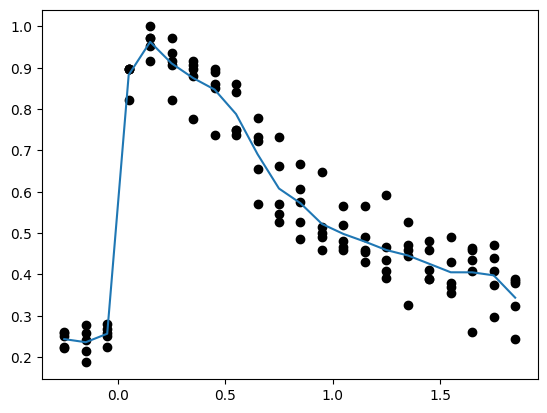

In [531]:
fig,ax = plt.subplots()
median_score = []
for ii in range(len(bins)-1):
    plt.scatter([bins[ii]+.05]*n_cross,scores[ii,:],c = 'k')
    median_score.append(np.mean(scores[ii,:]))
plt.plot(bins[:-1]+.05,median_score)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The basic principle of cross validation is useful for more then setting errorbars. Just as you can see how well a model works on held out testing data, you can also ask how well (or poorly) a model fit under one set of conditions works in another condition.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Lets back up and take a closer look at the raster from before </h3> 

What do you notice about the variation within a single color?

How do you think this relates to the structure of the task or what we learned in workshop 1?

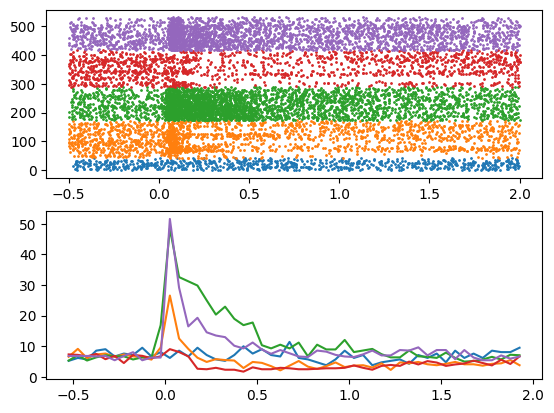

In [533]:
spike_times = this_structure_units_table.spike_times.values[18]
stim_times = trials.stim_start_time

pre_window  = .5
post_window = 2

triggered_spike_times = []
triggered_trial_index = []

for i, stim_time in enumerate(stim_times):
    # Select spikes that fall within the time window around this stimulus
    mask = ((spike_times >= stim_time - pre_window) & 
            (spike_times < stim_time + post_window))
    
    # Align spike times to stimulus onset (0 = stimulus)
    trial_spikes = spike_times[mask] - stim_time
    
    triggered_spike_times.append(trial_spikes)
    triggered_trial_index.append(np.ones(len(trial_spikes))*i)
    
triggered_spike_times = np.concatenate(triggered_spike_times)
triggered_trial_index = np.concatenate(triggered_trial_index).astype(int)
unq,stim_name = np.unique(trials.stim_name[triggered_trial_index],return_inverse = True)

fig,ax = plt.subplots(nrows = 2)
counter = 0
binsize = .05
for ii in range(len(unq)):
    this_triggered_spike_times = triggered_spike_times[stim_name==ii]
    _,this_trl_idx = np.unique(triggered_trial_index[stim_name==ii],return_inverse = True)
    ax[0].scatter(this_triggered_spike_times,counter + this_trl_idx,s = 1)
    counter +=np.max(this_trl_idx)

    a,b = np.histogram(this_triggered_spike_times,bins = np.arange(-.5,2+binsize,binsize))
    a = a/np.max(this_trl_idx)/binsize
    ax[1].plot(b[:-1]-binsize/2,a)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Lets try sorting one of these conditions in a different way, this time by the rewarded modality:

In [534]:
reward_mod = trials.rewarded_modality.values

In [535]:
triggered_trial_type = reward_mod[triggered_trial_index.astype(int)]

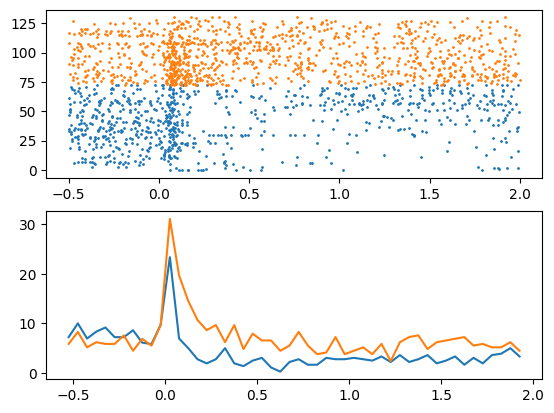

In [536]:
fig,ax = plt.subplots(nrows = 2)
counter = 0
binsize = .05

condition = 1

for ii,mod in enumerate(['aud','vis']):
    this_triggered_spike_times = triggered_spike_times[np.bitwise_and(stim_name==condition,triggered_trial_type==mod)]
    _,this_trl_idx = np.unique(triggered_trial_index[np.bitwise_and(stim_name==condition,triggered_trial_type==mod)],return_inverse = True)
    
    ax[0].scatter(this_triggered_spike_times,counter + this_trl_idx,s = 1)
    counter +=np.max(this_trl_idx)

    a,b = np.histogram(this_triggered_spike_times,bins = np.arange(-.5,2+binsize,binsize))
    a = a/np.max(this_trl_idx)/binsize
    ax[1].plot(b[:-1]-binsize/2,a)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> How will this difference effect decoding? </h3> 

What would happen if you tried to use a decoder trained on one condition to predict the other?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 4.0 Whats next?

For today's homework, you will get a chance to dig more into this final question. In workshop 1, you learned how to classify behavioral states. In this afternoon workshop, you learned how to decode neural population activity. Next, you get to combine the two, so see how behavioral state might impact neural decoding in MOs.

0.9411764705882353


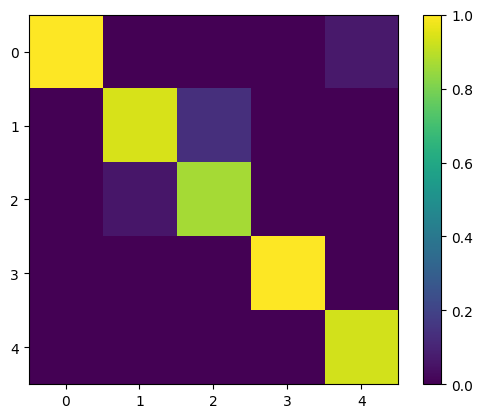

In [154]:
x_train,x_test,y_train,y_test = train_test_split(np.sum(storage[:,reward_mod=='aud',3:6],axis=2).T,trial_id[reward_mod=='aud'])
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print(clf.score(x_test,y_test))

plt.imshow(confusion_matrix(y_true=y_test, y_pred=prediction, normalize='pred'))
plt.colorbar()

0.8215613382899628


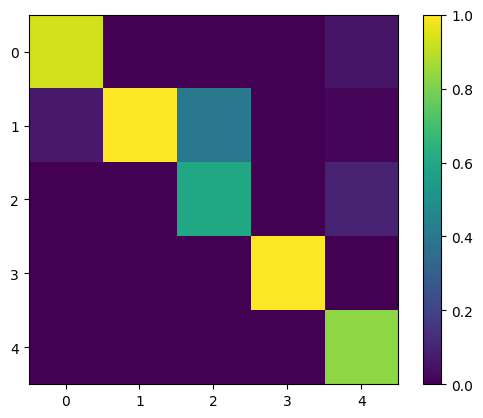

In [155]:
x_vis = np.sum(storage[:,reward_mod=='vis',3:6],axis=2).T
y_vis = trial_id[reward_mod=='vis']
print(clf.score(x_vis,y_vis))
prediction = clf.predict(x_vis)
plt.imshow(confusion_matrix(y_true=y_vis, y_pred=prediction, normalize='pred'))
plt.colorbar()

In [156]:
n_cross = 5

score_aud_aud = np.zeros([len(bins)-1,n_cross])
score_vis_vis = np.zeros([len(bins)-1,n_cross])

score_aud_vis = np.zeros(len(bins)-1)
score_vis_aud = np.zeros(len(bins)-1)


for ii in range(len(bins)-1):
    clf = svm.SVC()

    score_aud_aud[ii,:] = cross_validate(clf,storage[:,reward_mod=='aud',ii].T,trial_id[reward_mod=='aud'],cv=n_cross)['test_score']
    clf.fit(storage[:,reward_mod=='aud',ii].T,trial_id[reward_mod=='aud'])
    score_aud_vis[ii] = clf.score(storage[:,reward_mod=='vis',ii].T,trial_id[reward_mod=='vis'])

    score_vis_vis[ii,:] = cross_validate(clf,storage[:,reward_mod=='vis',ii].T,trial_id[reward_mod=='vis'],cv=n_cross)['test_score']
    clf.fit(storage[:,reward_mod=='vis',ii].T,trial_id[reward_mod=='vis'])
    score_vis_aud[ii] = clf.score(storage[:,reward_mod=='aud',ii].T,trial_id[reward_mod=='aud'])

    

In [157]:
bin_centers = bins[:-1]+np.median(np.diff(bins))/2

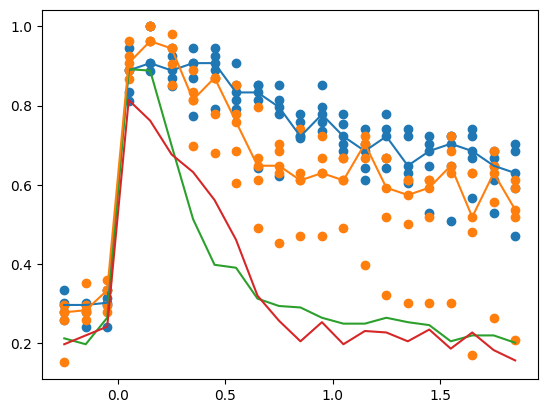

In [158]:
plt.plot(bin_centers,np.median(score_aud_aud,axis =1),c = color_list[0])
plt.scatter(bin_centers.repeat(n_cross),score_aud_aud.flatten(),c = color_list[0])
plt.plot(bin_centers,score_aud_vis,c = color_list[2])

plt.plot(bin_centers,np.median(score_vis_vis,axis =1),c = color_list[1])
plt.scatter(bin_centers.repeat(n_cross),score_vis_vis.flatten(),c = color_list[1])
plt.plot(bin_centers,score_vis_aud,c = color_list[3])

In [160]:
clf.coef_

AttributeError: coef_ is only available when using a linear kernel

In [27]:
def make_psth(spike_times, stim_times, pre_window=0.5, post_window=1.0, bin_size=0.05):
    """
    Generate a Peri-Stimulus Time Histogram (PSTH).
    
    Parameters:
    - spike_times: array-like, timestamps of all spikes (in seconds)
    - stim_times: array-like, timestamps of stimulus onsets (in seconds)
    - pre_window: float, time before stimulus to include in PSTH (seconds)
    - post_window: float, time after stimulus to include in PSTH (seconds)
    - bin_size: float, width of each time bin (seconds)
    
    Returns:
    - firing_rates: 2D numpy array of firing rates (trials x bins)
    - bin_centers: 1D numpy array of bin center times (relative to stimulus onset)
    """

    # Ensure inputs are numpy arrays 
    spike_times = np.array(spike_times)
    stim_times = np.array(stim_times)
    
    # Define bin edges from -pre_window to +post_window
    bins = np.arange(-pre_window, post_window + bin_size, bin_size)
    
    # Compute centers of bins (for plotting)
    bin_centers = bins[:-1] + bin_size / 2
    
    # Initialize a matrix to hold spike counts: rows = trials, columns = bins
    all_counts = np.zeros((len(stim_times), len(bins) - 1))
    
    # Loop through each stimulus time to compute trial-specific spike counts
    for i, stim_time in enumerate(stim_times):
        # Select spikes that fall within the time window around this stimulus
        mask = ((spike_times >= stim_time - pre_window) & 
                (spike_times < stim_time + post_window))
        
        # Align spike times to stimulus onset (0 = stimulus)
        trial_spikes = spike_times[mask] - stim_time
        
        # Bin the aligned spikes and count how many fall into each bin
        counts, _ = np.histogram(trial_spikes, bins=bins)
        
        # Store the result in the i-th row (trial)
        all_counts[i, :] = counts
    
    # Convert spike counts to firing rates (spikes per second)
    firing_rates = all_counts / bin_size
    
    # Return firing rates (trials x bins) and bin center positions
    return firing_rates, bin_centers
